In [1]:
pip install yfinance pandas scikit-learn matplotlib

In [2]:
import yfinance as yf

# Define the stock ticker and the date range
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch the historical stock price data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960457  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251144  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826843  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484337  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650360  132079200


In [3]:
import pandas as pd

# Use only the 'Close' price for prediction
data = data[['Close']]

# Create a new column 'Target' which is the 'Close' price shifted by one day
data['Target'] = data['Close'].shift(-1)

# Drop the last row as it will have a NaN target value
data = data.dropna()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Separate features and targets
X_train = train_data[['Close']].values
y_train = train_data['Target'].values
X_test = test_data[['Close']].values
y_test = test_data['Target'].values

<ipython-input-3-e2a1f1dd1c44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')

Linear Regression MSE: 4.483507164009182


In [5]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Regressor MSE: {mse_dt}')

Decision Tree Regressor MSE: 59.71230484369305


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regressor MSE: {mse_rf}')

Random Forest Regressor MSE: 66.37822387462234


In [7]:
from sklearn.svm import SVR

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Support Vector Regressor MSE: {mse_svr}')

Support Vector Regressor MSE: 461.23044765446707


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM model
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}')

Epoch 1/10
26/26 [==============================] - 2s 3ms/step - loss: 19807.3242
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 16127.4121
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 12700.9541
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 9383.2969
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 3430.3428
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 543.5679
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 67.2060
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 9.7191
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 8.7002
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
LSTM MSE: 4.453972093244338


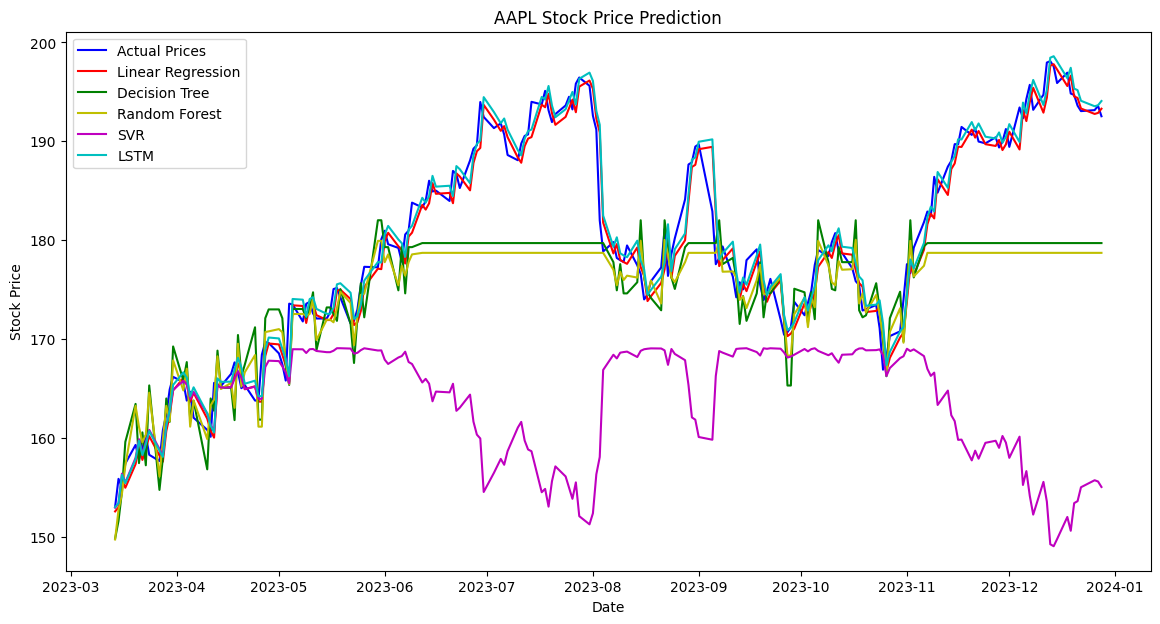

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot actual vs predicted stock prices for each model
plt.plot(test_data.index, y_test, label='Actual Prices', color='b')

plt.plot(test_data.index, y_pred_lr, label='Linear Regression', color='r')
plt.plot(test_data.index, y_pred_dt, label='Decision Tree', color='g')
plt.plot(test_data.index, y_pred_rf, label='Random Forest', color='y')
plt.plot(test_data.index, y_pred_svr, label='SVR', color='m')
plt.plot(test_data.index, y_pred_lstm, label='LSTM', color='c')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()